## Recursión ingenua

In [2]:
def fib(n, nivel=0):
    if n==0 or n==1:
        print(" "*nivel,"fib({}) = {}".format(n, 1))
        return 1
    print(" "*nivel,"fib({}) [".format(n))
    result = fib(n-1,nivel+4) + fib(n-2,nivel+4)
    print(" "*nivel,"] = {}".format(n,result))
    return result

In [4]:
fib(5)

 fib(5) [
     fib(4) [
         fib(3) [
             fib(2) [
                 fib(1) = 1
                 fib(0) = 1
             ] = 2
             fib(1) = 1
         ] = 3
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
     ] = 4
     fib(3) [
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
         fib(1) = 1
     ] = 3
 ] = 5


8

In [5]:
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

In [6]:
%time fib(35)

Wall time: 3.31 s


9227465

In [7]:
def fib(n, mem = {}):
    if n < 2:
        return n
    try:
        return mem[n]
    except KeyError:
        res = fib(n-1, mem) + fib(n-2, mem)
        mem[n] = res
    return res

In [9]:
%time fib(350)

Wall time: 1 ms


6254449428820551641549772190170184190608177514674331726439961915653414425

# Problema de la mochila 1/0

¿Cómo decide un ladrón qué se lleva?

Es difícil la vida de un ladrón.  A veces se encuentra en una casa con muchas cosas que llevarse y con tan solo un saco o mochila pequeña.  Si carga mucho se romperá y se quedará sin nada. Pero ¿qué elegir?  

Este problema es un clásico, el problema de la mochila 0/1.  El 0/1 se refiere a que solo hay dos opciones para cada cosa, cogerla o no.  No hay posibilidad de cogerla a medias.

Este problema no tiene solución en tiempo polinómico. El un problema cuya solución óptima se calcula en tiempo exponencial.  Por ejemplo, se puede usar enumeración exhaustiva.


# Problema de la mochila 0/1

* Elemento representado por (valor, peso)
* Mochila acomoda elementos hasta peso $w$
* Sea $I$ el vector de elementos disponibles
* Sea $V$ vector que indica si se coge o no
* Encontrar V que maximiza
	$$\sum V_i \cdot I_i^{valor}$$
    
  sujeto a la restricción

	$$\sum V_i \cdot I_i^{peso} \leq w$$



In [11]:
def prueba0():
    nombres = ['a', 'b', 'c', 'd']
    valores = [6, 7, 8, 9]
    pesos   = [3, 3, 2, 5]
    elems   = zip(nombres, valores, pesos)
    val, saco = mochila01(elems, 5)
    for e in saco:
        print(e)
    print('Valor total =', val)

def valor(e): return e[1]
def peso(e): return e[2]

# Otra forma: Arbol de decisión

<img src="diag/decision-tree.svg" width="50%" align="right" style="display:float;"/>

* Arbol binario
* Cada nodo con una tupla
   * Elementos a coger
   * Elementos que no se ha tomado decisión
   * *Valor de elementos a coger*
   * *Espacio disponible aún*
* Izquierda: toma $e_i$
* Derecha: no toma $e_i$


In [75]:
%%file diag/decision-tree.bd
blockdiag {
    default_fontsize = 18
    default_node_color = "orange"

    E -> E0
    E -> E1 [label="toma E0", fontsize=10]
    E0 -> E00
    E0 -> E01 [label="toma E1", fontsize=10]
    E1 -> E10
    E1 -> E11 [label="toma E1", fontsize=10]
    //E00 -> E000
    //E00 -> E001
    //E01 -> E010
    //E01 -> E011
    //E10 -> E100
    //E10 -> E101
    //E11 -> E110
    //E11 -> E111

    E,E0,E1,E00,E01,E10,E11 [width = 50, shape=roundedbox]
    //E000,E001,E010,E011,E100,E101,E110,E111 [width = 50, shape=roundedbox]
    E [label=""]
    E0 [label="0"]
    E1 [label="1"]
    E00 [label="00"]
    E01 [label="01"]
    E10 [label="10"]
    E11 [label="11"]
    //E000 [label="000"]
    //E001 [label="001"]
    //E010 [label="010"]
    //E011 [label="011"]
    //E100 [label="100"]
    //E101 [label="101"]
    //E110 [label="110"]
    //E111 [label="111"]
}

Overwriting diag/decision-tree.bd


In [76]:
!blockdiag -Tsvg diag/decision-tree.bd

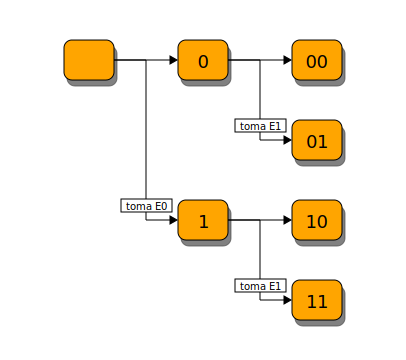

In [77]:
from IPython.display import SVG

SVG('diag/decision-tree.svg')